# Imports

In [1]:
# Bibliotecas para aumentar dataset #####################
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.vgg16 import VGG16 #Biblioteca cnn-vgg16
import numpy as np

#####################  Bibliotecas para separar dados #####################
import cv2 #Trabalhar com imagens
from sklearn.model_selection import train_test_split #Separar dados de treino e teste
from sklearn.utils import shuffle #Embaralhar dados
import os #sistema operacional

# Função para aumentar o dataset

In [2]:
def dataAugmentation(path, classe):
    image = load_img(path)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    # contruindo o gerador de imagem para data augmentation
    aug = ImageDataGenerator(
        rotation_range=30,
        zoom_range=0.15,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode="nearest")
    
    total = 0
    saveDir = ''
    #local de destino das imagens
    if(classe == 0):
        saveDir = os.getcwd()+'/Aug/NewG0/'
    elif(classe == 1):
        saveDir = os.getcwd()+'/Aug/NewG1/'
    elif(classe == 2):
        saveDir = os.getcwd()+'/Aug/NewG2/'
    elif(classe == 3):
        saveDir = os.getcwd()+'/Aug/NewG3/'
    elif(classe == 4):
        saveDir = os.getcwd()+'/Aug/NewG4/'
        
    imageGen = aug.flow(image, batch_size=1, save_to_dir=saveDir,
            save_prefix="image", save_format="jpg")
    # loop que faz o controle do número de imagens a serem geradas (no caso 100)
    for image in imageGen:
        if total == 25:
            break
        total += 1

# Data augmentation

In [3]:
path = os.getcwd()+'/GrausPt/'

for caminho, d, file in os.walk(path):
    for filename in file:
        img = cv2.imread(os.path.join(caminho,filename))

        if caminho == os.getcwd()+'/GrausPt/g0':
            cv2.imwrite(os.getcwd()+'/Aug/NewG0/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 0)
       
        elif caminho == os.getcwd()+'/GrausPt/g1':
            cv2.imwrite(os.getcwd()+'/Aug/NewG1/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 1)
          
        elif caminho == os.getcwd()+'/GrausPt/g2':
            cv2.imwrite(os.getcwd()+'/Aug/NewG2/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 2)
            
        elif caminho == os.getcwd()+'/GrausPt/g3':
            cv2.imwrite(os.getcwd()+'/Aug/NewG3/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 3)
        
        elif caminho == os.getcwd()+'/GrausPt/g4':
            cv2.imwrite(os.getcwd()+'/Aug/NewG4/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 4)

# Carregar imagens

In [4]:
path = os.getcwd()+'/Aug/'
data_set = []
saidas = []
        
for caminho, d, file in os.walk(path):
    for filename in file:
        
        img = cv2.imread(os.path.join(caminho,filename))
        
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Deixa a imagem com tons de cinza
        #equalized_image = cv2.equalizeHist(gray) #Aumentar o contraste da imagem
        img = np.array(cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA))
        data_set.append(img)
        
        if caminho == os.getcwd()+'/Aug/NewG0':
            saidas.append(0)
        elif caminho == os.getcwd()+'/Aug/NewG1':
            saidas.append(1)
        elif caminho == os.getcwd()+'/Aug/NewG2':
            saidas.append(2)
        elif caminho == os.getcwd()+'/Aug/NewG3':
            saidas.append(3)
        elif caminho == os.getcwd()+'/Aug/NewG4':
            saidas.append(4)

In [5]:
len(saidas), len(data_set)

(9206, 9206)

In [6]:
X, Y = shuffle(data_set, saidas) #embaralha os dados

train_X = []
train_Y = []

test_X = []
test_Y = []

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=42) #separa os dados em treino e teste com porcentagen de 80% para treino

#Deixando no mesmo tipo do array do data_set
train_Y = np.array(train_Y).astype('uint8')
test_Y = np.array(test_Y).astype('uint8')

train_X = np.array(train_X)
test_X = np.array(test_X)

In [7]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Tamanho e quantidade da base de dados de treino:', train_X.shape, train_Y.shape)

print('Tamanho e quantidade da base de dados de teste:', test_X.shape, test_Y.shape)

Tamanho e quantidade da base de dados de treino: (7364, 128, 128, 3) (7364,)
Tamanho e quantidade da base de dados de teste: (1842, 128, 128, 3) (1842,)


In [8]:
# Encontra o numero de classes
classes = np.unique(train_Y) #Pega o valores sem repetição
nClasses = len(classes)
print('Numero total de classes:', nClasses)
print('Saida das classes:', classes)

Numero total de classes: 5
Saida das classes: [0 1 2 3 4]


Text(0.5, 1.0, 'Classe : 2')

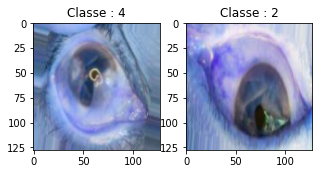

In [9]:
plt.figure(figsize=[5,5])

#Mostra a primeira imagem dos dados de treino

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Classe : {}".format(train_Y[0]))

#Mostra a primeira imagem dos dados de teste
plt.subplot(122)
plt.imshow(test_X[5,:,:], cmap='gray')
plt.title("Classe : {}".format(test_Y[5]))

In [10]:
# Deixar as imagens na mesma dimensão
train_X = train_X.reshape(-1, 128, 128, 3)
test_X = test_X.reshape(-1, 128, 128, 3)
train_X.shape, test_X.shape

((7364, 128, 128, 3), (1842, 128, 128, 3))

In [11]:
#Normalizando a imagens deixando os pixels entre 0 e 1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [12]:
# Mudança de codificação de código de classe para se padronizar com o Keras.
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Testando a padronização de rotulo
print('Rotulo Original:', train_Y[0])
print('Depois da conversão para o one-hot:', train_Y_one_hot[0])

Rotulo Original: 4
Depois da conversão para o one-hot: [0. 0. 0. 0. 1.]


In [13]:
#Validação do modelo
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
train_X[0].shape, valid_X.shape, train_label.shape, valid_label.shape

((128, 128, 3), (1473, 128, 128, 3), (5891, 5), (1473, 5))

In [15]:
#A rede
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD

In [16]:
batch_size = 64 #Quantidade de neuronios que seram utilizados.
epochs = 10 #Interações
num_classes = 5

# regressão logística

In [17]:
model = Sequential([Flatten(),Dense(5, activation='softmax')])
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.fit(train_X, train_label, epochs=5)
#model.evaluate(valid_X, nputil.argmax(valid_label)) 
model.fit(train_X, train_label, epochs = 5, initial_epoch = 0, validation_data = (valid_X, valid_label))

Epoch 1/5


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [160]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-17-a5394e05558c>:5) ]] [Op:__inference_train_function_785]

Function call stack:
train_function


# TRANSFER LEARNING

In [129]:
vgg = keras.applications.VGG16(input_shape=(128,128,3), include_top = False, weights= 'imagenet')

58892288/58889256 [==============================] - 18s 0us/step


In [130]:
x = vgg.output
x = Flatten()(x)
x = Dense(3078,activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x) 
x = Dropout(0.2)(x)
out = Dense(5,activation='softmax')(x)
tf_model=Model(inputs=vgg.input,outputs=out)
for layer in tf_model.layers[:20]:
    layer.trainable=False

In [131]:
tf_model.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
train_label.shape

In [ ]:
history = tf_model.fit(train_X, train_label, batch_size = 64, epochs = 60, initial_epoch = 0, validation_data = (valid_X, valid_label))

In [ ]:
#Salvando treinamento
tf_model.save("fashion_model_dropout.h5py")

In [ ]:
#Validação da parte de teste
test_eval = tf_model.evaluate(test_X, test_Y_one_hot, verbose=1)

In [ ]:
#Plotando graficos referentes a treinamento e validação acurácia e loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Predizendo a  classe a partir da base de teste_X
predicted_classes = tf_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]

In [ ]:
#Mostrando a quantidade de acertos e alguns exemplos
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

In [ ]:
#Mostrando a quantidade de erros e alguns exemplos
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
#Precisão de classificação
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

# REDE CRIADA PARA CLASSIFICAR

In [17]:
fashion_model = Sequential()

fashion_model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(128,128,3)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.2))

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.01))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.01))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.01))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(512, activation='sigmoid'))
fashion_model.add(LeakyReLU(alpha=0.01))           
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(num_classes, activation='softmax'))
sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [18]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0

In [19]:
#Compilando a rede neural criada usando como metrica a accurancy
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [20]:
import time

In [23]:
ini = time.time()
#Treinando a rede
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=60,verbose=1,validation_data=(valid_X, valid_label))
fim = time.time()
print(f'tempo: {ini-fim}')

Epoch 1/60
93/93 [==============================] - 44s 471ms/step - loss: 0.0943 - accuracy: 0.9688 - val_loss: 0.1743 - val_accuracy: 0.9430
Epoch 2/60
93/93 [==============================] - 44s 478ms/step - loss: 0.1004 - accuracy: 0.9647 - val_loss: 0.1810 - val_accuracy: 0.9362
Epoch 3/60
93/93 [==============================] - 45s 479ms/step - loss: 0.1089 - accuracy: 0.9633 - val_loss: 0.1800 - val_accuracy: 0.9369
Epoch 4/60
93/93 [==============================] - 44s 477ms/step - loss: 0.0955 - accuracy: 0.9654 - val_loss: 0.1717 - val_accuracy: 0.9416
Epoch 5/60
93/93 [==============================] - 44s 477ms/step - loss: 0.1172 - accuracy: 0.9599 - val_loss: 0.1678 - val_accuracy: 0.9382
Epoch 6/60
93/93 [==============================] - 44s 477ms/step - loss: 0.1004 - accuracy: 0.9633 - val_loss: 0.1619 - val_accuracy: 0.9450
Epoch 7/60
93/93 [==============================] - 45s 487ms/step - loss: 0.0920 - accuracy: 0.9659 - val_loss: 0.1449 - val_accuracy: 0.9477

Epoch 58/60
93/93 [==============================] - 44s 474ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.1914 - val_accuracy: 0.9443
Epoch 59/60
93/93 [==============================] - 44s 475ms/step - loss: 0.0576 - accuracy: 0.9805 - val_loss: 0.1583 - val_accuracy: 0.9525
Epoch 60/60
93/93 [==============================] - 44s 474ms/step - loss: 0.0553 - accuracy: 0.9803 - val_loss: 0.1384 - val_accuracy: 0.9538
tempo: -2696.777595281601


In [24]:
import os
beep = lambda x: os.system("echo -n '\a';sleep 0.2;" * x)
beep(10)

0

In [25]:
#Salvando treinamento
fashion_model.save("semTransfer.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: semTransfer.h5py/assets


In [26]:
#Validação da parte de teste
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

58/58 [==============================] - 3s 48ms/step - loss: 0.1544 - accuracy: 0.9593


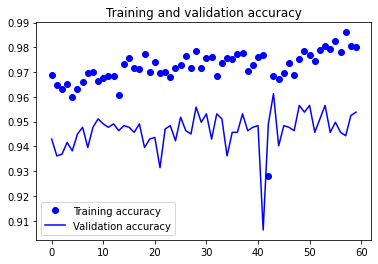

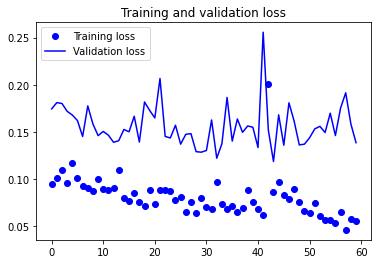

In [27]:
#Plotando graficos referentes a treinamento e validação acurácia e loss
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
#Predizendo a  classe a partir da base de teste_X
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((1842,), (1842,))

Encontrado 1766 amostras corretas


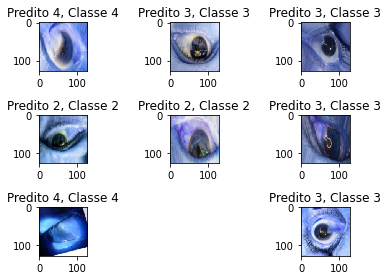

In [29]:
#Mostrando a quantidade de acertos e alguns exemplos
correct = np.where(predicted_classes==test_Y)[0]
print ("Encontrado %d amostras corretas" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predito {}, Classe {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Encontrado 76 amostras incorretas


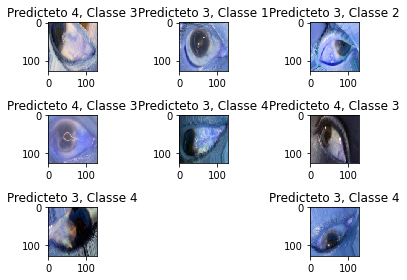

In [30]:
#Mostrando a quantidade de erros e alguns exemplos
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Encontrado %d amostras incorretas" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predicteto {}, Classe {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [31]:
#Precisão de classificação
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       170
     Class 1       0.97      0.94      0.96       104
     Class 2       0.99      0.93      0.96       233
     Class 3       0.95      0.97      0.96       830
     Class 4       0.95      0.94      0.94       505

    accuracy                           0.96      1842
   macro avg       0.97      0.96      0.96      1842
weighted avg       0.96      0.96      0.96      1842

